## <span style="color:black">Описание проекта<span>

Надо сделать прогноз оттока клиентов, использую модель машинного обучения и данных о клиентах фитнес центра.

## <span style="color:black"> Подготовка данных<span>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools
from sklearn.metrics import silhouette_score
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [2]:
#прочитаем из csv-файла данные о клиентах
gym = pd.read_csv('/datasets/gym_churn.csv')

#распечатаем его размер и первые 5 строк
print(gym.shape)
display(gym.head(5))

(4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
gym.columns = [x.lower().replace(' ', '_') for x in gym.columns.values]
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

У нас есть 4000 данных о посетителях фитнес центра, пропусков нет, названия столбцов привели  нижнему регистру.
Категориальных признаков нет. Целевая переменная (y) - столбец churn.

## <span style="color:black">Исследовательский анализ данных (EDA)<span>

In [4]:
#посмотрим средние значения и стандартные отклонения:
gym.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [5]:
display (gym.groupby('churn').mean().T)

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


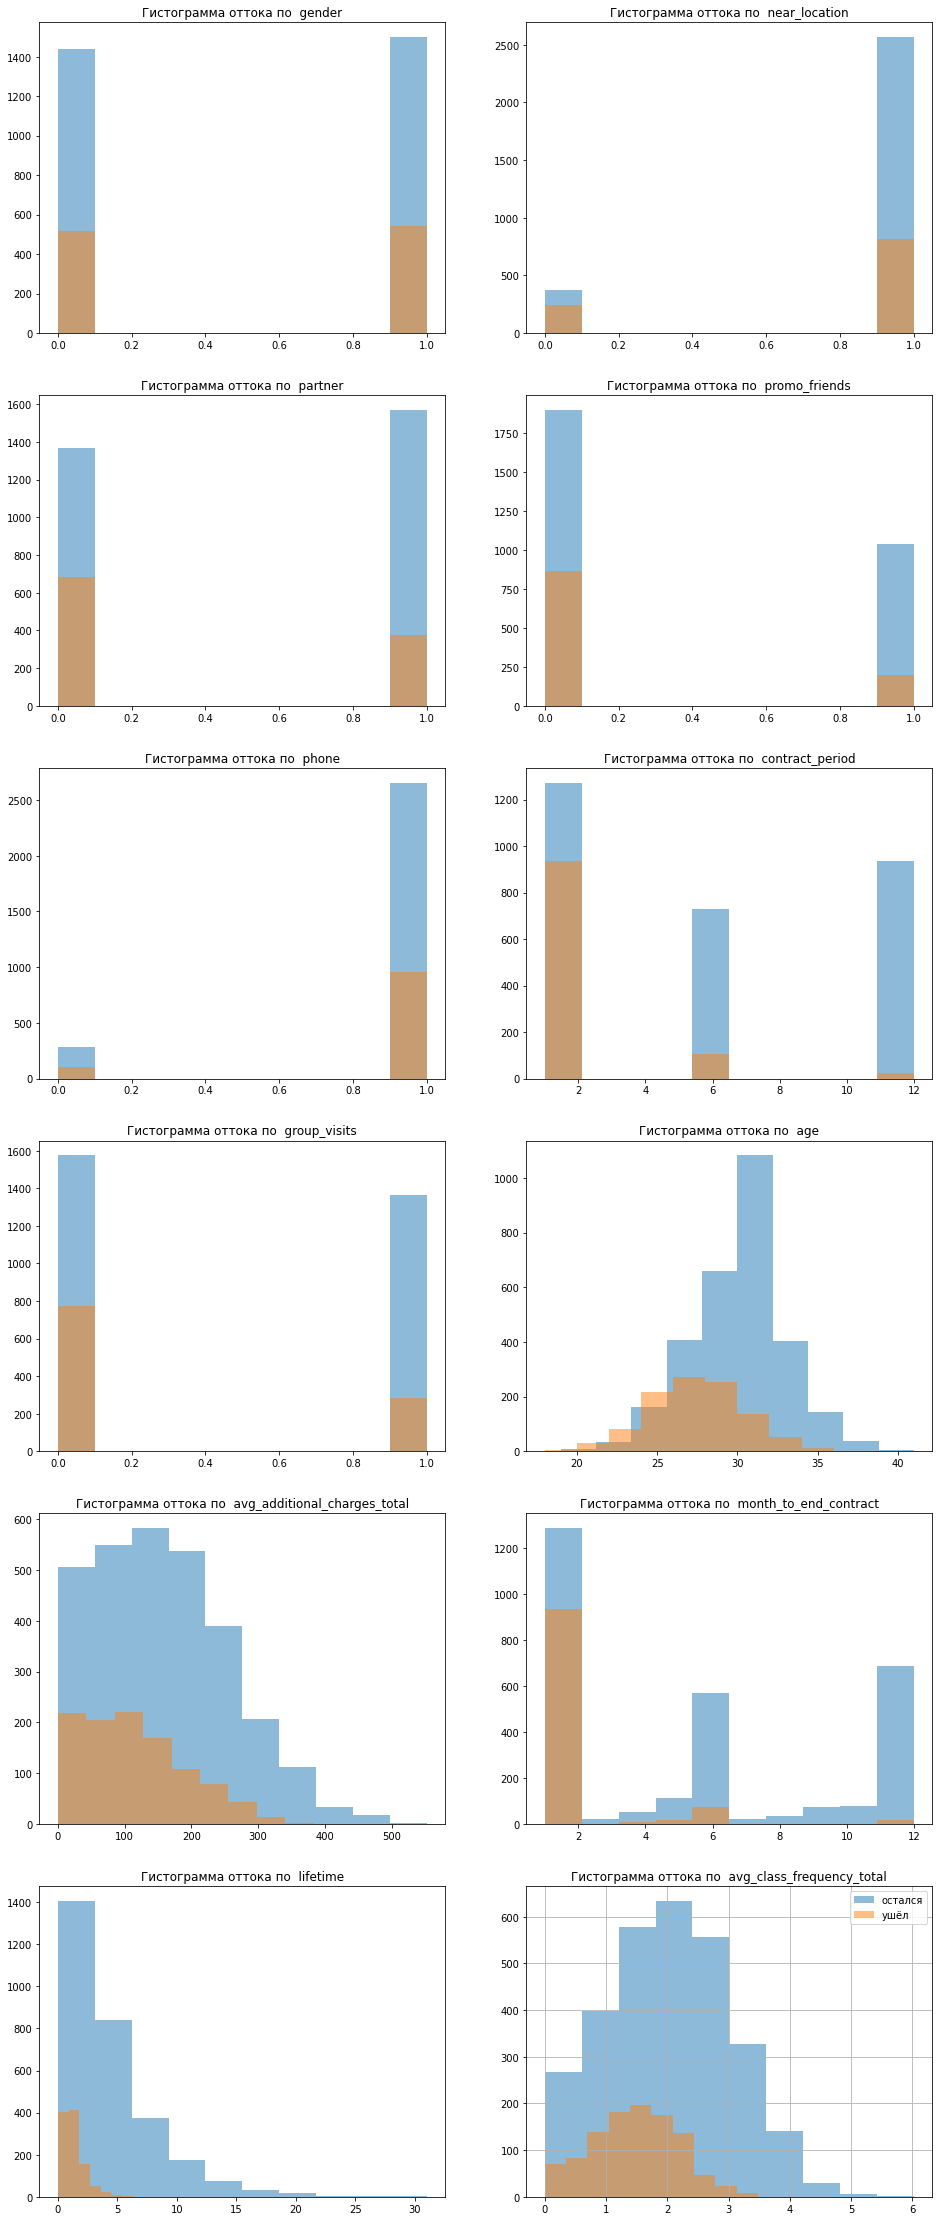

In [6]:
#гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
fig, axes = plt.subplots(nrows = 6, ncols =2, figsize=(16, 40))

col = list(gym.drop('churn', axis = 1).columns)
n=0

for ax in axes.flat:
    ax.hist (gym.loc[gym.loc[:,'churn']==0][col[n]], bins = 10, alpha = 0.5, label = 'остался')
    ax.hist (gym.loc[gym.loc[:,'churn']==1][col[n]], bins = 10, alpha = 0.5, label = 'ушёл')
    ax.set (title = 'Гистограмма оттока по'+'  '+ col[n])
    n+=1
labels = ["остался","ушёл"]
plt.legend(labels)
plt.grid(True)
plt.show()

1. gender - мы видим, что мужчин и женщин примерно одинаковое количество, уровень оттока тоже похож
2. near_location - клиентов, живущих поблизости в пять раз больше и доля оттока среди них ниже, чем у тех, кто ездит издалека. Видимо расстояние важный фактор.
3.   partner - — сотрудников компании-партнёра клуба немого выше, но они более стабильны. У тех, кто не по этой программе, отток почти 50%.
4. promo_friends - использование промо-кода от знакомого не сильно распространено, но клиенты, пришедшие по рекомендации имеют меньший отток. Возможно, это направление стоит развивать.
5.   phone  - наличие и отсутсвие телефона не меняет долю оттока, хотя клиентов с телефоном значительное большинство.
6.   contract_period - длительность абонемента имеет большое значение, наибольший отток у месячного контракта.
7.   group_visits -факт посещения групповых занятий положительно сказывается на удержании клиеннтов.
8.   age - основной возраст с риском оттока 25 - 30 лет.
9.   avg_additional_charges_total  - гистограмма показывает нормальное распределение.
10.   month_to_end_contract  - срок до окончания текущего действующего абонемента (в месяцах) 1 -2 месяца имеют наибольший отток.
11.  lifetime   - похожую картину мы видели с  contract_period. Возможно, у нас есть мультиколлинеарные признаки.
12.  avg_class_frequency_total  - средняя частота посещений в неделю за все время с начала действия абонемента, где зона риска у клиентов с тренировкой 1-2 раза в неделю.
13.  avg_class_frequency_current_month - похожа на 12.  avg_class_frequency_total .

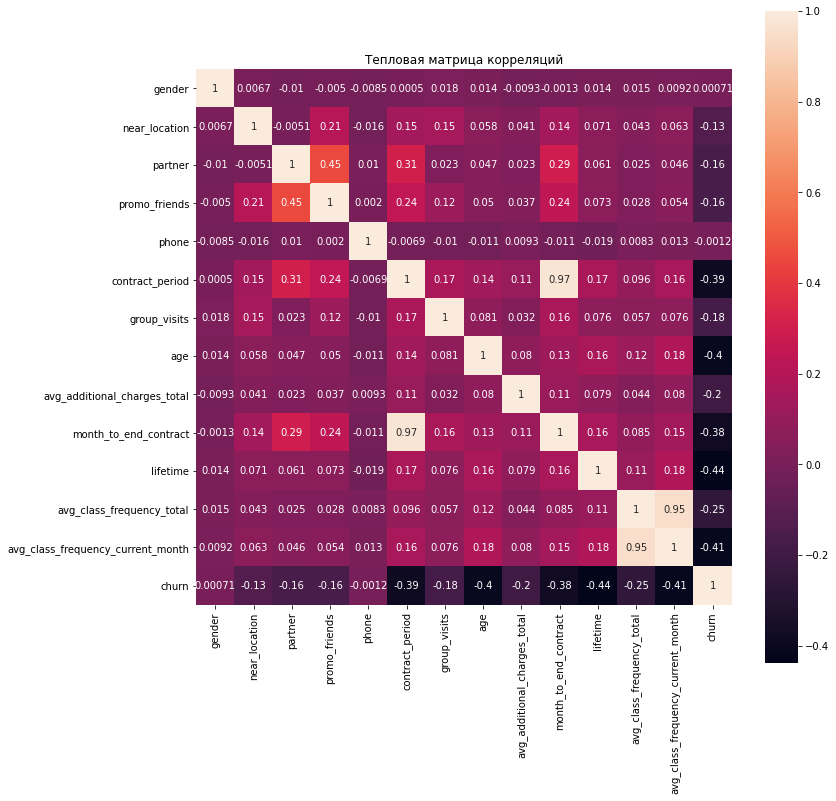

In [7]:
#построим и отрисуем матрицу корреляций
cm = gym.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize=(12, 12))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap (cm, annot = True, square = True) #ваш код здесь
ax.set (title = 'Тепловая матрица корреляций')
plt.show()

Тепловая карта выявила наличие нескольких мультиколлинеарных признаков: 0.95 у avg_class_frequency_total и avg_class_frequency_current_month; 0,97 у month_to_end_contract и contract_period. Надо будет удалить один из признаков в каждой паре. 
По карте видно, что 'partner', 'group_visits', 'promo_friends' - оказывают очень слабое влияние, а 'age' и 'contract period' наоборот более сильное.

In [8]:
gym.drop('avg_class_frequency_current_month', axis = 1, inplace = True)

In [9]:
gym.drop('month_to_end_contract', axis = 1, inplace = True)

В ходе EDA анализа было проделано и установлено:

Всего записей в таблице 4000 - достаточно для прогнозирования.
Данные целостные, пропусков и дубликатов нет, сильные выбросы отсутствуют.
Все признаки и целевая переменная являются числовыми, поэтому сильных изменений не потребовалось
Все признаки имеют обратную(отрицательную) корреляцию с целевой переменной (то есть - чем сильнее признак, тем слабее отток клиентов)
Так же присутствуют 2 пары признаков которые очень сильно коррелируют между собой и это надо учитывать при построении моделей прогнозирования в случае линейной регрессии.
Данные готовы для разбивки на выборки.

## <span style="color:black">Модель прогнозирования оттока клиентов<span>

In [10]:
#модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце

#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop(['churn'], axis = 1) 
y = gym ['churn'] 

#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)


In [11]:
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
print(X_train_st[:5])

#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

[[ 0.98265048  0.42368158  1.03175391 -0.65709005  0.32751555  0.29763717
   1.19034383  0.55025283 -0.92337193 -0.19265756 -1.92902575]
 [ 0.98265048  0.42368158 -0.96922337 -0.65709005  0.32751555  1.62230884
   1.19034383 -1.28583586  0.16252804 -0.46105294  1.33328297]
 [-1.01765584  0.42368158 -0.96922337  1.52186142  0.32751555  0.29763717
   1.19034383  0.24423805  0.30907146 -0.46105294 -0.76508827]
 [-1.01765584  0.42368158  1.03175391  1.52186142  0.32751555  0.29763717
   1.19034383 -1.28583586 -0.99057964 -0.99784369  0.51992504]
 [-1.01765584  0.42368158 -0.96922337  1.52186142 -3.05329013  1.62230884
   1.19034383 -0.06177673  0.02573737 -0.46105294 -0.29392092]]


In [12]:
# функция для обучения модели и вывода метрик:

def fit_predict_print (model, X_train, y_train, X_test, y_test, word):
    model.fit(X_train, y_train) # обучим модель
    predictions = model.predict(X_test) # бинарный прогноз
    print('Метрики при автоматическом прогнозе'+word)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
    print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

In [13]:
# зададим алгоритм для нашей модели
model = LogisticRegression(random_state=0)
word = 'с помощью логистической регрессии'
fit_predict_print (model, X_train_st, y_train, X_test_st, y_test, word)

Метрики при автоматическом прогнозес помощью логистической регрессии
Accuracy: 0.91
Precision: 0.83
Recall: 0.83
F1: 0.83


In [14]:
# зададим алгоритм для нашей модели
model = RandomForestClassifier()
word = 'с помощью случайного леса'
fit_predict_print (model, X_train, y_train, X_test, y_test, word)

Метрики при автоматическом прогнозес помощью случайного леса
Accuracy: 0.89
Precision: 0.83
Recall: 0.75
F1: 0.79


Вывод: Сравнивая метрии двух моделей, получается, прогноз с помощью логистической регрессии проявил себя лучше.

По параметру Accuracy "Логистическая регрессия" немного выигрывает у "Случайный лес" (0,91 против 0,89), по precision равны (0,83 и 0,82) и также немного лучше по recall (0,83 против 0,76). F1 лучше у Регрессии.


По всем параметрам "Логистическая регрессия" дает результат немного лучше чем "Случайный лес"

Также надо отметить у обоих моделей очень высокий показатель Accuracy (около 0,90), а также высокие показатели precision и recall (0,76 - 0,83)

## <span style="color:black">Кластеризация клиентов<span>

In [15]:
#Отложим в сторону столбец с оттоком и проведем кластеризацию объектов (клиентов), стандартизируем данные
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
x_sc = scaler.fit_transform(gym.drop(columns = ['churn'])) # обучаем нормализатор и преобразуем набор данных 

In [16]:
#Построем матрицу расстояний функцией linkage() на стандартизованной матрице признаков
linked = linkage(x_sc, method = 'ward') 

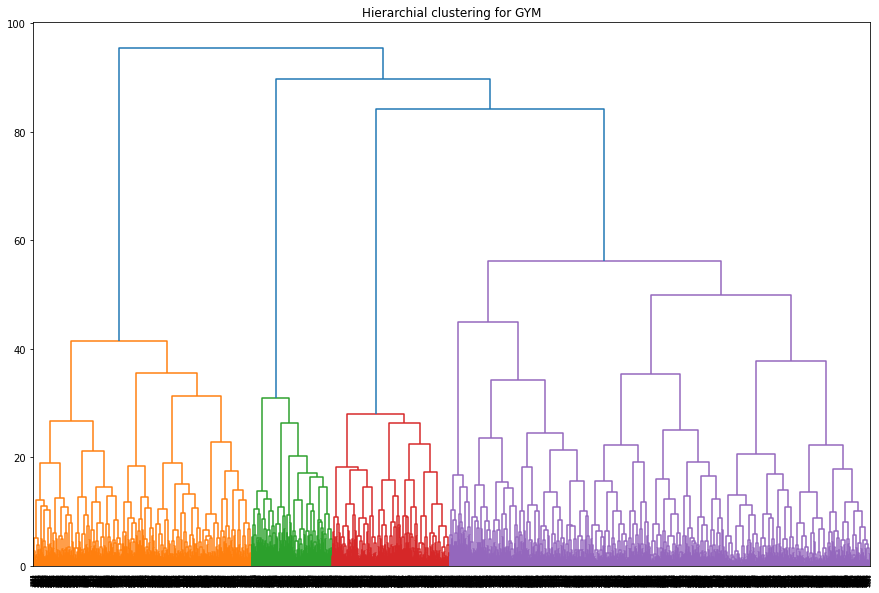

In [17]:
# дендрограмма
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

По Дендрограмме видно, что можно выделить 4, 5 или 6 больших кластеров клиентов

In [18]:
#модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов, число кластеров n=5, учитывая дендрограмму выше
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0) 
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
gym['cluster_km'] = labels
gym

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0,4
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0,3
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0,2
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0,1
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,8,2.284497,0,1
3996,0,1,0,0,1,1,1,29,68.883764,1,1.277168,1,3
3997,1,1,1,1,1,12,0,28,78.250542,2,2.786146,0,1
3998,0,1,1,1,1,6,0,32,61.912657,3,1.630108,0,1


In [19]:
#количество клиентов в кластерах
gym.groupby(['cluster_km'])['gender'].count()

cluster_km
0     561
1    1050
2    1132
3     871
4     386
Name: gender, dtype: int64

Вполне неплохо (по количеству), - самая большая и маленькие группы отличаются в 3 раза (4-386 , 2-1132)

In [20]:
# посчитаем метрику силуэта для нашей кластеризации
print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)))

Silhouette_score: 0.14


Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация.

Судя по Silhouette_score=0.17, - кластеризация прошла плохо.

In [21]:
# выводим статистику по средним значениям наших признаков по кластеру
gym.drop('churn', axis=1).groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.499109,0.488571,0.505300,0.544202,0.523316
near_location,0.000000,0.995238,1.000000,1.000000,0.862694
partner,0.488414,0.955238,0.238516,0.250287,0.471503
promo_friends,0.076649,0.892381,0.059187,0.079219,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,3.032086,7.660952,2.819788,4.528129,4.777202
group_visits,0.235294,0.458095,0.000000,1.000000,0.427461
age,28.721925,29.543810,28.770318,29.536165,29.297927
avg_additional_charges_total,137.540009,155.861428,143.383993,148.088897,144.208179
lifetime,3.060606,4.380952,3.343640,3.761194,3.940415


Можно заметить характерные признаки кластеров:

Кластер 0: Живут рядом, 47% от партнеров, 30% промо-кодов, без телефона, контракт на 3-6 месяца, половина групповые занятия посещает, возраст около 29 лет.
 
Кластер 1: Живут рядом, из компаний-партнеров, промо-код используют, контракт больше полугода, половина занимается в группах, возраст около 29 лет.

Кластер 2: Живут рядом, 24% от партнеров, без промо-кодов, контракт на 1-3 месяца, групповые занятия не посещают, возраст около 28 лет.

Кластер 3: Живут рядом, 25% от партнеров, без промо-кодов, контракт на 3-6 месяца, групповые занятия посещают, возраст около 29 лет.
 
Кластер 4: Живут далеко, контракт на 3 месяца примерно, возраст около 28 лет, промо-код не использовали.

In [22]:
gym.drop(['cluster_km', 'churn'], axis=1).mean()

gender                            0.510250
near_location                     0.845250
partner                           0.486750
promo_friends                     0.308500
phone                             0.903500
contract_period                   4.681250
group_visits                      0.412250
age                              29.184250
avg_additional_charges_total    146.943728
lifetime                          3.724750
avg_class_frequency_total         1.879020
dtype: float64

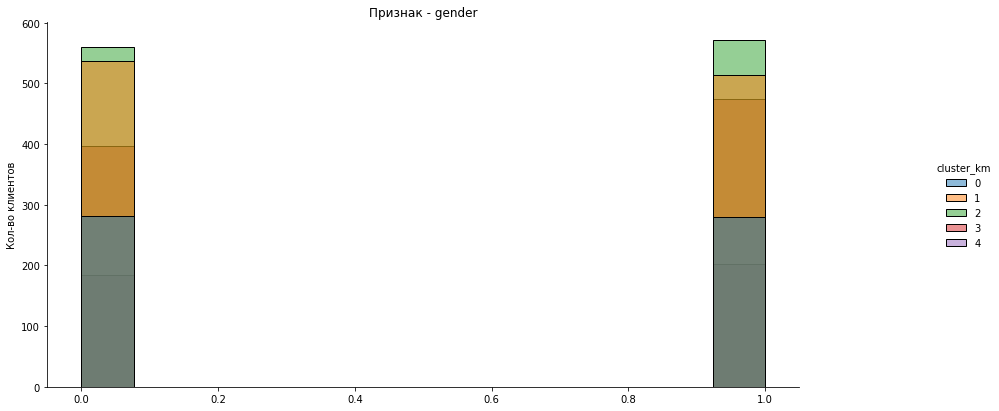

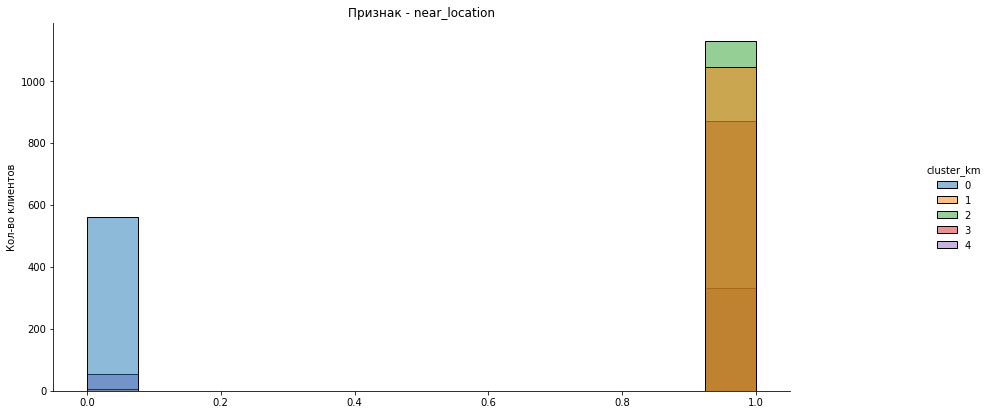

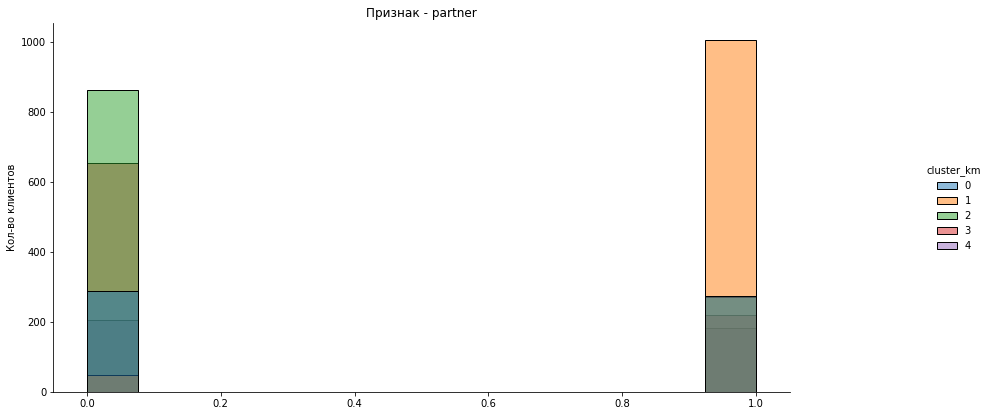

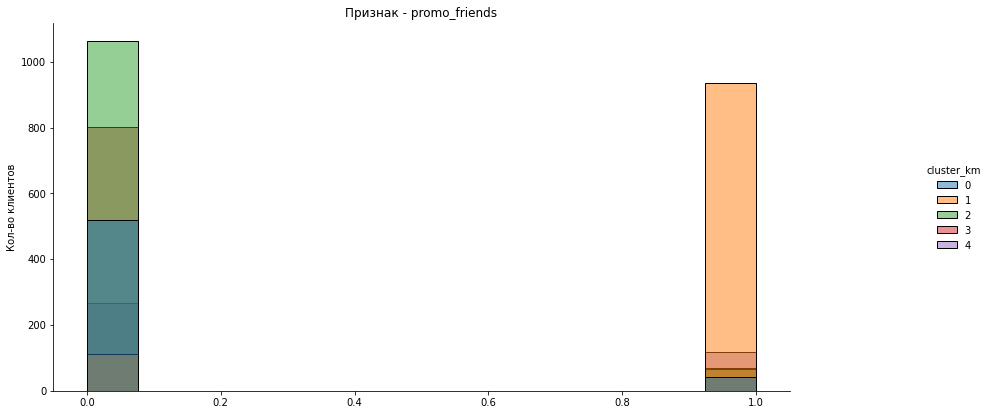

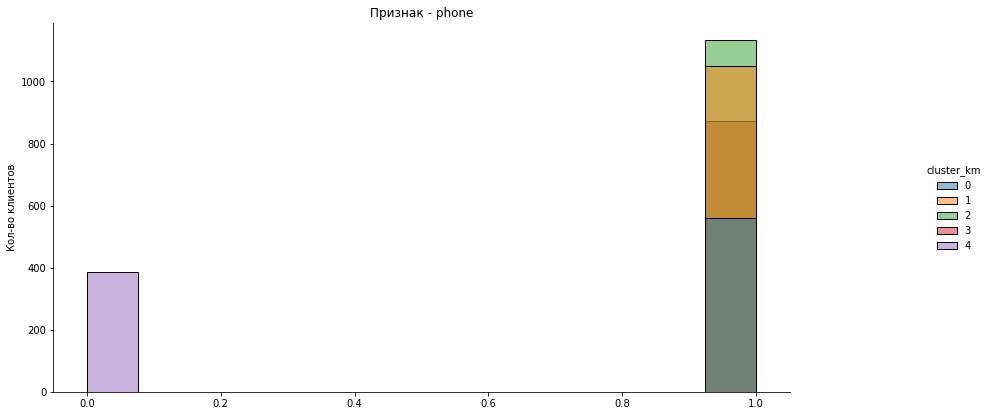

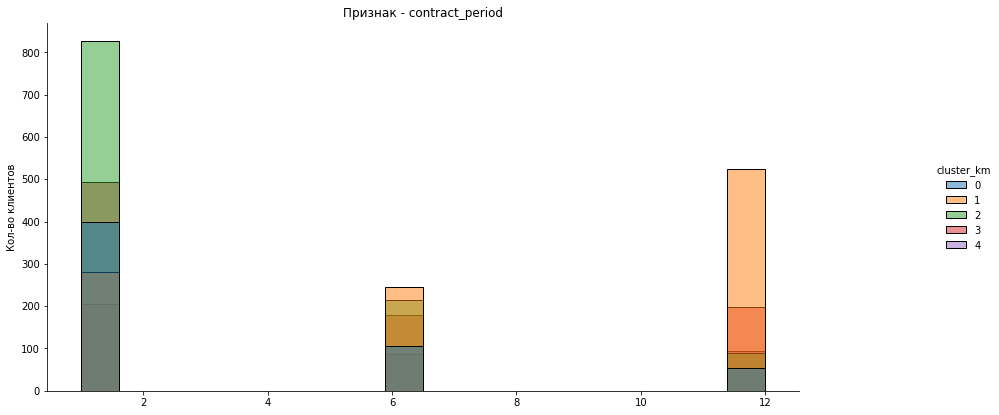

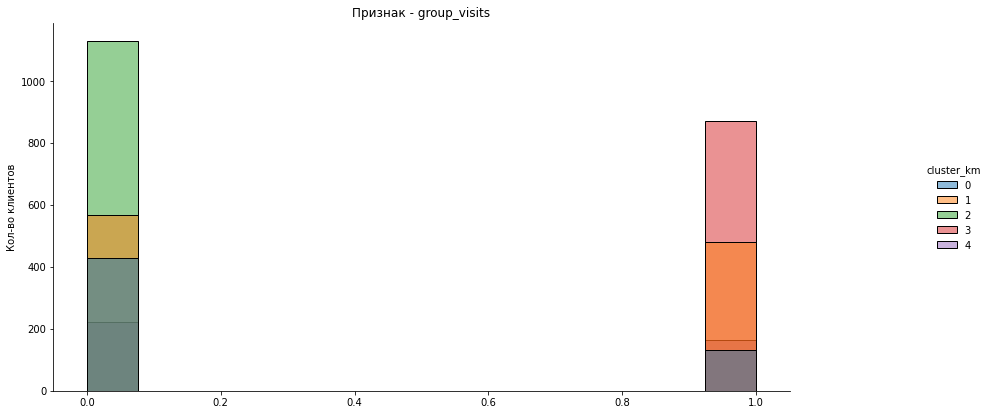

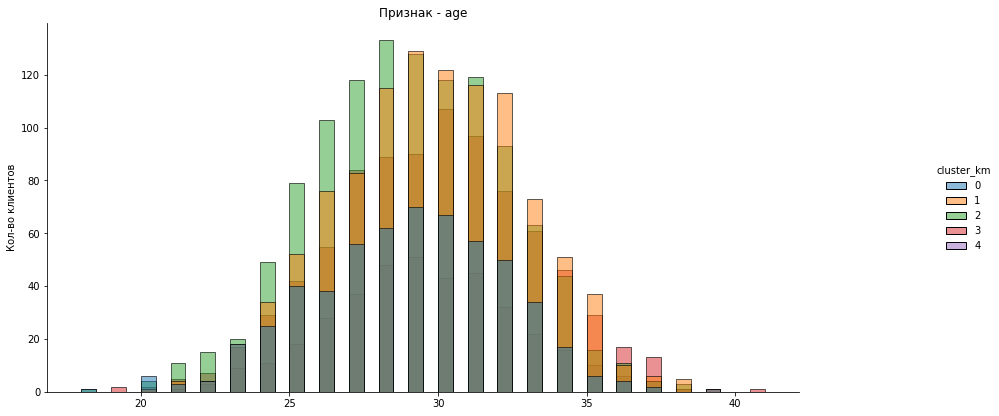

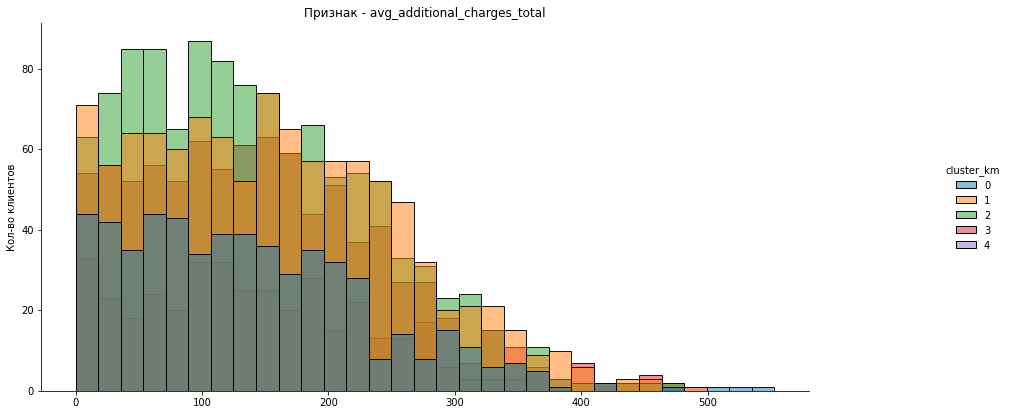

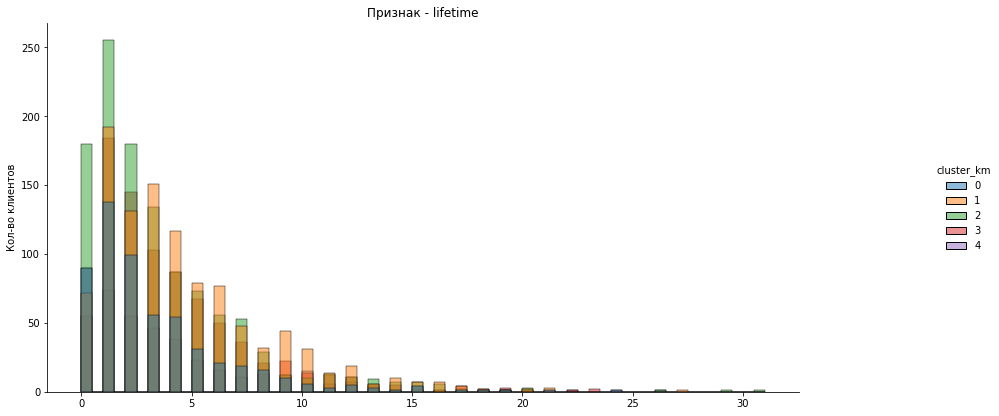

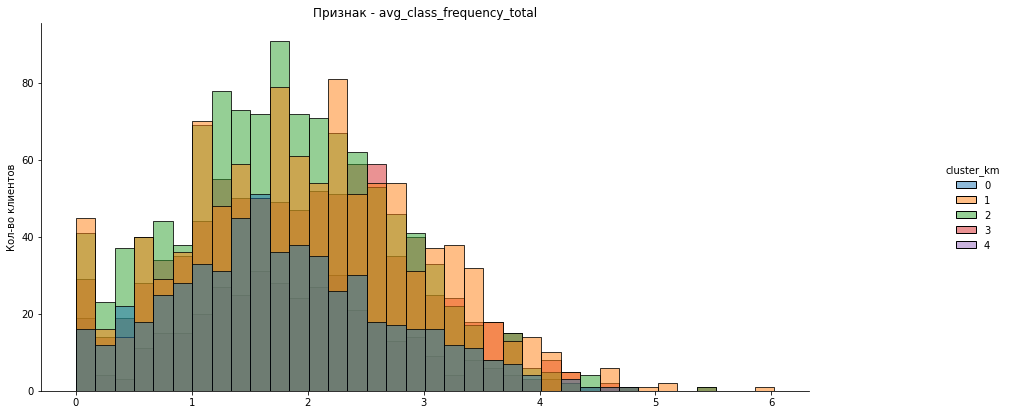

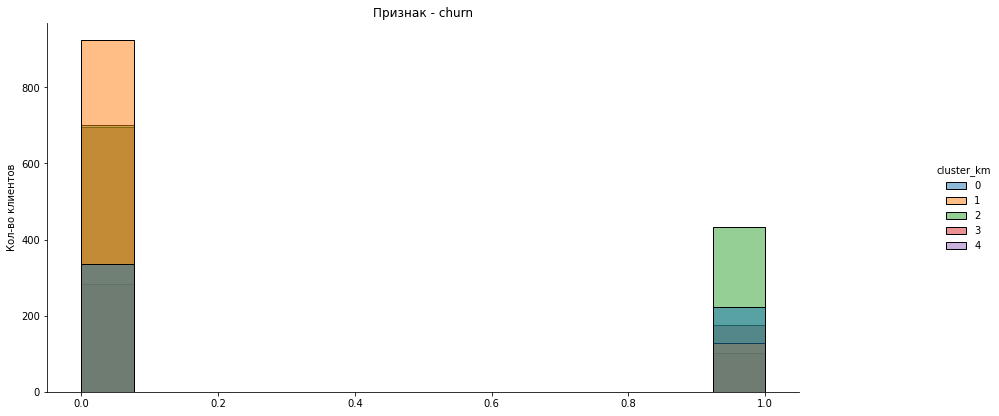

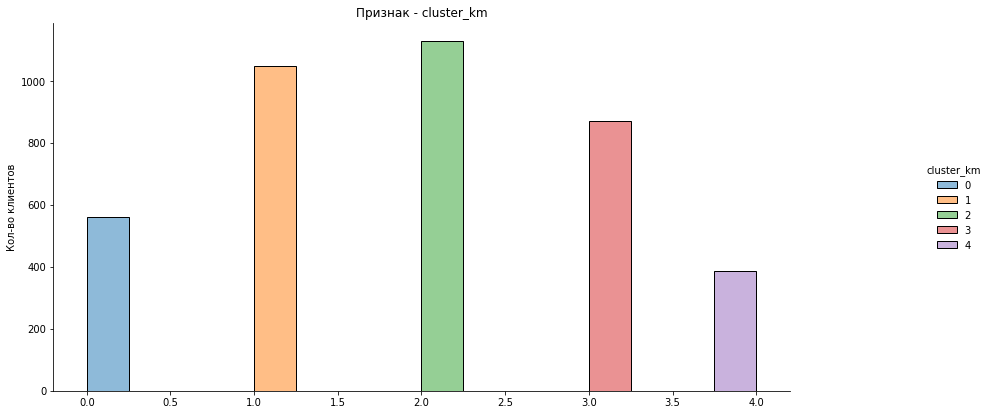

In [23]:
#распределения признаков для кластеров
for f in gym:
    g = sns.displot(gym, x=gym[f], hue='cluster_km', palette="tab10", kind='hist' ) 
    plt.title(f'Признак - {f}')
    plt.ylabel("Кол-во клиентов")
    plt.xlabel("")
    g.fig.set_figwidth(15)
    g.fig.set_figheight(6)
    g.fig.patch.set_linewidth(5)    

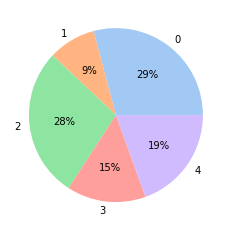

In [24]:
#доля оттока для каждого кластера
churn_per_cluster = gym.groupby('cluster_km')['churn'].sum()/gym.groupby('cluster_km')['churn'].count()

colors = sns.color_palette('pastel')[0:5]
labels = ['0', '1', '2', '3', '4']
#plt.title('Доли оттока в кластерах')
plt.pie(churn_per_cluster, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

В 4 и 2 кластере доля оттока клиентов почти треть (28% и 29%), в группе 0 19%, самые надежные группы 1 и 3.

## <span style="color:black">Выводы и базовые рекомендации<span>

По всем параметрам "Логистическая регрессия" дает результат немного лучше чем "Случайный лес"
При построении моделей прогнозирования оттока клиентов были использованы модели "Логистическая регрессия" и "Случайный лес". Обе модели показали отличные результаты - высокий показатель Accuracy (больше 0,91), а также высокие показатели precision и recall (в диапазоне 0,76 - 0,83).

Кластеризация:
В результате анализа было принято решение разбить клиентов на 5 кластеров. Судя по метрике Silhouette_score=0.17, - кластеризация прошла плохо.

Результаты:

Кластер 0 - средний - отток 19% (от всего оттока):
Живут рядом, 47% от партнеров, 30% промо-кодов, без телефона, контракт на 3-6 месяца, половина групповые занятия посещает, возраст около 29 лет.

Кластер 1 - самый лучший, доля оттока около 9% (от всего оттока) - 
Живут рядом, из компаний-партнеров, промо-код используют, контракт больше полугода, половина занимается в группах, возраст около 29 лет.

Кластер 2 - плохой, доля оттока довольно велика 28% (от всего оттока):
Это те клиенты, которые живут рядом, 24% от партнеров, без промо-кодов, контракт на 1-3 месяца, групповые занятия не посещают, возраст около 28 лет.

Кластер 3 - средний кластер, здесь отток 15% (от всего оттока):
Те клиенты, которые Живут рядом, 25% от партнеров, без промо-кодов, контракт на 3-6 месяца, групповые занятия посещают, возраст около 29 лет.

Кластер 4 - плохой, здесь отток 29% (от всего оттока):
Это те клиенты, которые живут далеко, контракт на 3 месяца примерно, возраст около 28 лет, промо-код не использовали.

Рекомендации:

Завлекать клиентов предлагая партнерские программы и промо-акции.
Завлекать клиентов предлагая более выгодные цены на абонементы за 12 месяцев.
Предлагать участвовать в групповых занятиях.
Создавать приятную, притягивающую атмосферу чтобы клиенты ходили чаще 2-3 раза в неделю
Целевая аудитория :
Те кто живет или работает близко,
Уделить внимание старшему поколению 30+
И меньше тратить ресурсов на тех, кто моложе 30 и живет неблизко.